In [2]:
import pandas as pd
import numpy as np
import glob

## Music dataframe

In [3]:
# our custom table with music and genres
data = pd.read_csv("./fixed_data.csv")
data = data.drop(['Unnamed: 0'], axis=1)
data = data.rename(columns={'from_data': 'title'})

In [4]:
# remove extension if there is some
data["title"] = pd.DataFrame(data["title"].replace(to_replace=r'.mp3', value='', regex=True))
data = data.sort_values("title")
data.head()

,student,coarse_genre,genre1,genre2,genre3,title
0,Шемякина Аня,Rock,Blues Rock,NaN,NaN,7Horse_-_Answer_the_Bell
1,Людмила_Проценко,classic,neo-classical,new age piano,NaN,A_Simple_Life-Brian_Crain
2,Никанорова Даша,Classic,Instrumental,NaN,NaN,Adagio_in_G_Minor-Albinoni
3,Паша_Дерябин,electro,Synthwave,NaN,NaN,Age_Atomic-Solar_Bears
4,Darya Khaleneva,new_age,downtempo,ambient,NaN,Agnus_Dei-Enigma


## Features dataframe

In [5]:
# directory with numpy arrays of features
features_arrays = glob.glob('./features/features_30/features_30/*.npy')

In [6]:
# df to collect mean features values for each feature in entire music track
mean_features_df = pd.DataFrame()

In [7]:
# going through all files in folder with arrays, exctracting their names to fill the title column

for array in features_arrays:
    path = './features/features_30/features_30/' + array  
    read_array = np.load(array)
    song_name = path.split('/')[-1]
    
    mean_features = pd.DataFrame(pd.DataFrame(read_array).mean(axis=0)).T
    mean_features_title = mean_features.insert(0, 'title', song_name)
    mean_features_df = pd.concat([mean_features_df, mean_features])

# giving correct names to features, removing extentions .mp3 and .npy

mean_features_df = mean_features_df.rename(columns={0: 'amplitude_envelope', 1: 'root_mean_square', 2: 'zero_crossing_rate', 3: 'spectral_bandwidth', 4: 'spectral_centroid', 5: 'spectral_flatness'})
mean_features_df["title"] = mean_features_df["title"].replace(to_replace=r'.npy', value='', regex=True)
mean_features_df["title"] = mean_features_df["title"].replace(to_replace=r'.mp3', value='', regex=True)
mean_features_df = mean_features_df.sort_values("title")

In [8]:
mean_features_df.head()

,title,amplitude_envelope,root_mean_square,zero_crossing_rate,spectral_bandwidth,spectral_centroid,spectral_flatness
0,7Horse_-_Answer_the_Bell,0.069510,0.871047,0.316126,2277.809402,1971.450854,0.009720
0,A_Simple_Life-Brian_Crain,0.050781,0.234817,0.085297,1115.090935,877.457314,0.000171
0,Adagio_in_G_Minor-Albinoni,0.077048,0.131447,0.044511,1590.882768,1445.911859,0.001278
0,Age_Atomic-Solar_Bears,0.046596,0.609212,0.229749,1740.572950,1365.380247,0.003198
0,Agnus_Dei-Enigma,0.038225,0.385504,0.153035,1708.590315,1176.505367,0.001561


## Music data with features (merged)

In [23]:
# now we have same values in title columns, so we merge
merged_data = pd.merge(data, mean_features_df, on='title')

In [10]:
merged_data.head()

,student,coarse_genre,genre1,genre2,genre3,title,amplitude_envelope,root_mean_square,zero_crossing_rate,spectral_bandwidth,spectral_centroid,spectral_flatness
0,Шемякина Аня,Rock,Blues Rock,NaN,NaN,7Horse_-_Answer_the_Bell,0.069510,0.871047,0.316126,2277.809402,1971.450854,0.009720
1,Людмила_Проценко,classic,neo-classical,new age piano,NaN,A_Simple_Life-Brian_Crain,0.050781,0.234817,0.085297,1115.090935,877.457314,0.000171
2,Никанорова Даша,Classic,Instrumental,NaN,NaN,Adagio_in_G_Minor-Albinoni,0.077048,0.131447,0.044511,1590.882768,1445.911859,0.001278
3,Паша_Дерябин,electro,Synthwave,NaN,NaN,Age_Atomic-Solar_Bears,0.046596,0.609212,0.229749,1740.572950,1365.380247,0.003198
4,Darya Khaleneva,new_age,downtempo,ambient,NaN,Agnus_Dei-Enigma,0.038225,0.385504,0.153035,1708.590315,1176.505367,0.001561


In [24]:
merged_data['coarse_genre'] = merged_data['coarse_genre'].str.lower()

In [ ]:
merged_data.to_csv("data_with_features_30.csv", index=False)

### Stricter breakdown by genre

In [26]:
# country group
x = ['country', 'ethnic', 'folk']
merged_data['coarse_genre'] = merged_data['coarse_genre'].apply(lambda i: i if i not in x else 'country_group')

In [28]:
# metal
x = ['symphonic_metal', 'alternative_metal', 'alternative metal', 'heavy_metal']
merged_data['coarse_genre'] = merged_data['coarse_genre'].apply(lambda i: i if i not in x else 'metal')

In [30]:
# rock
x = ['alt_rock', 'alternative_rock', 'pop rock', 'alternative rock', 'christian_rock', 'funk_rock', 'indi_rock',
        'indie rock', 'indie_rock', 'progressive_rock', 'rap rock', 'soft_rock', 'alternative']
merged_data['coarse_genre'] = merged_data['coarse_genre'].apply(lambda i: i if i not in x else 'rock')

In [32]:
# pop
x = ['britpop', 'indi_pop', 'indie_pop', 'j-pop', 'indie_pop']
merged_data['coarse_genre'] = merged_data['coarse_genre'].apply(lambda i: i if i not in x else 'pop')

In [34]:
# classic
x = ['classics', 'art_song', 'orchestral']
merged_data['coarse_genre'] = merged_data['coarse_genre'].apply(lambda i: i if i not in x else 'classic')

In [36]:
# electro
x = ['electronica', 'electronic', 'electropop']
merged_data['coarse_genre'] = merged_data['coarse_genre'].apply(lambda i: i if i not in x else 'electro')

In [38]:
# disco
merged_data["coarse_genre"] = merged_data["coarse_genre"].replace(to_replace=r'dance', value='disco', regex=True)

In [40]:
# rap 
merged_data["coarse_genre"] = merged_data["coarse_genre"].replace(to_replace=r'hip-hop', value='rap', regex=True)

In [43]:
# other
x = ['country_group', 'metal', 'rock', 'pop', 'classic', 'electro', 'disco', 'rap']
merged_data['coarse_genre'] = merged_data['coarse_genre'].apply(lambda i: i if i in x else 'other')

In [45]:
# after a more strict breakdown by genre, we suggest the following groups
set(merged_data.coarse_genre.values)

{'classic',
 'country_group',
 'disco',
 'electro',
 'metal',
 'other',
 'pop',
 'rap',
 'rock'}

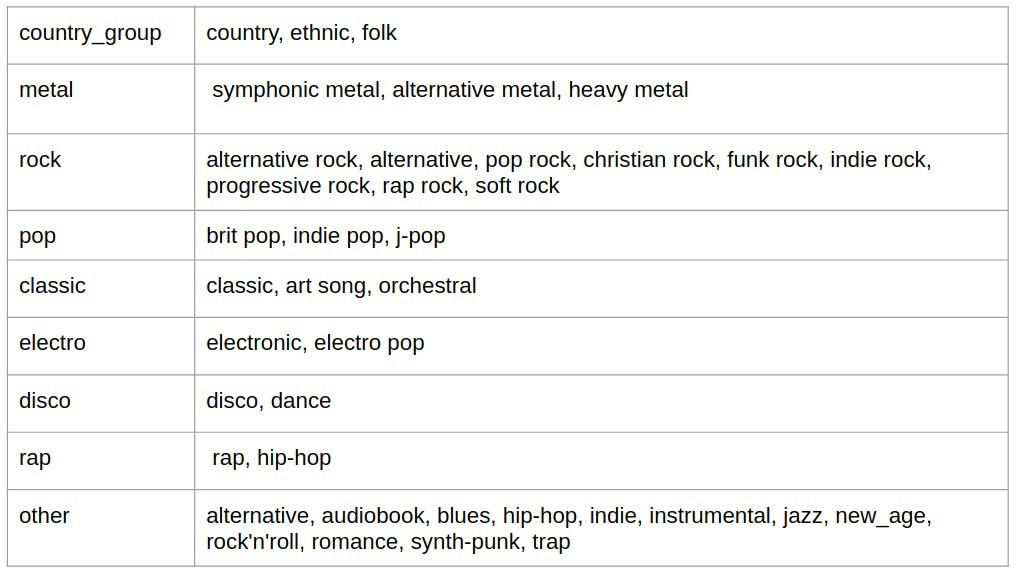

In [388]:
merged_data.to_csv("data_with_features_30_fixed_genres.csv", index=False)